### Titanic analysis
This project focus on building a knn neighbor classifier model to be able to predict which passengers will survive to the titanic sinking.

The model will try to classify if the passenger survive or not depending on the important variables which can influence in this result.

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:

#We import the dataset
df = pd.read_csv(r"..\ml_projects\ml_datasets\Titanic-Dataset.csv")

In [3]:
#We create a dataframe
df = pd.DataFrame(df)

In [4]:
#drop null values
df = df.dropna()

In [5]:

#We display the first few rows of the dataframe
print(df.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


In [6]:
#Display the shape of the dataframe
print(df.shape)

(183, 12)


In [7]:
#Overview of the dataframe
print("Key aspects")
print(df.describe())
print(df.info())

Key aspects
       PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Da

In [8]:
#Change sex values to 0 and 1

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

We will drop variables like PassengerId or Ticket cause they don´t have any relevance in the survival probability

In [9]:
#Use the important columns for the analysis

x=  df.drop(columns=["Ticket","Cabin","Fare","Name","PassengerId","SibSp","Parch","Age","Survived","Embarked"])

y=df["Survived"]

In [10]:

#Divide our train and test data 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

Here is an overview of the training data and the testing data of the model.

In [11]:
#Training and testing overview

print("Training data")
print(x_train.head())
print("Testing data")
print(x_test.head())

Training data
     Pclass  Sex
492       1    0
118       1    0
299       1    1
765       1    1
540       1    1
Testing data
     Pclass  Sex
183       2    0
823       3    1
879       1    1
647       1    0
292       2    0


In [12]:

#Create an instance of the logistic regression model
lg_model = LogisticRegression()

In [20]:

# Fit the model with the  training data
lg_model.fit(x_train,y_train)
obj_predicted = lg_model.predict(x_test)
acc_score = accuracy_score(y_test,obj_predicted)

In [21]:
print("Results of predictions:")
print(obj_predicted)


print("Accuracy of the model:")
print(acc_score * 100)


Results of predictions:
[0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 1]
Accuracy of the model:
73.91304347826086


The model has achieved a 73% accuracy level
Still can be adjusted to make better predictions with our data.

Now let's visualize the results using the matplotlib library

In [15]:
#Matplotlib library
import matplotlib.pyplot as plt

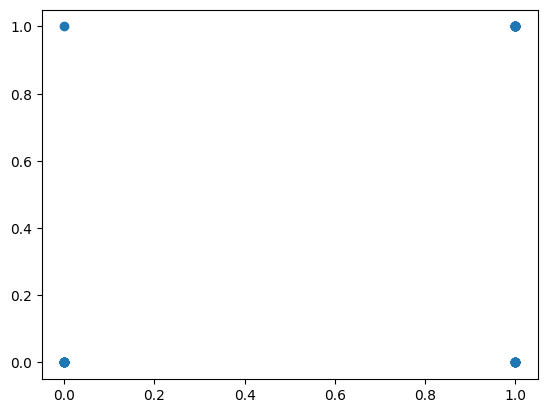

In [16]:
plt.scatter(y_test,obj_predicted)